<a href="https://colab.research.google.com/github/Gelo0101/Analyzing-and-Visualizing-the-Data-from-the-Library-of-LSPU/blob/main/Library_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Library Data**

1. Import Libraries

In [ ]:
import pandas as pd  #Data manipualtion
import numpy as np   #Numerical Operation
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns


**2. Load Data Set**

In [ ]:
#Load Dataset
df = pd.read_csv("/content/Library.csv")

#Display the data
df.head()

,College,What part/s of the library are you visiting? (you may check more than 1),Timestamp,What is your degree/course program?,What part/s of the library are you visiting? (you may check more than 1).1
0,CAS,Thesis,1/9/2023 9:38,BS Psychology,Thesis
1,CAS,Thesis,1/9/2023 9:39,BS Psychology,Thesis
2,CAS,Thesis,1/9/2023 9:43,BS Psychology,Thesis
3,CAS,Thesis,4/9/2023 13:40,BS Psychology,Thesis
4,CAS,Thesis,4/9/2023 15:20,BS Biology,Thesis


**1. Timestamp Analysis**

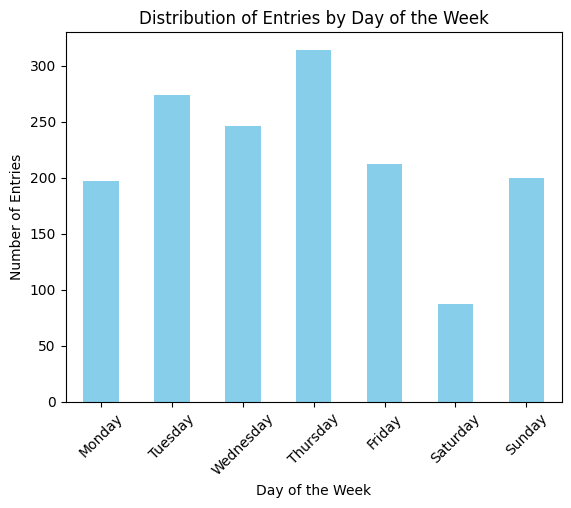

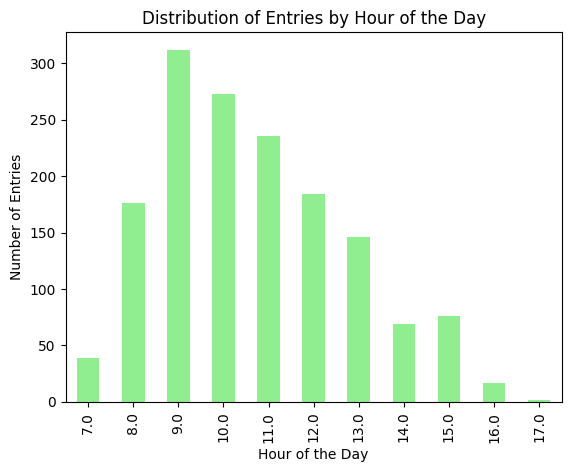

The peak visiting hour is 9.0 and the most popular visiting day is Thursday.


In [ ]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features like day of the week and hour of the day
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['HourOfDay'] = df['Timestamp'].dt.hour

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualize the distribution of entries over days of the week
day_of_week_counts = df['DayOfWeek'].value_counts().reindex(day_order)
day_of_week_counts.plot(kind='bar', rot=45, color='skyblue')
plt.title('Distribution of Entries by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Entries')
plt.show()

# Visualize the distribution of entries over hours of the day
hour_of_day_counts = df['HourOfDay'].value_counts().sort_index()
hour_of_day_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Entries by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Entries')
plt.show()

# Identify peak visiting hours or popular visiting days
peak_hours = hour_of_day_counts.idxmax()
popular_day = day_of_week_counts.idxmax()

print(f"The peak visiting hour is {peak_hours} and the most popular visiting day is {popular_day}.")

 **2. Overall Distribution of Visits for each College**

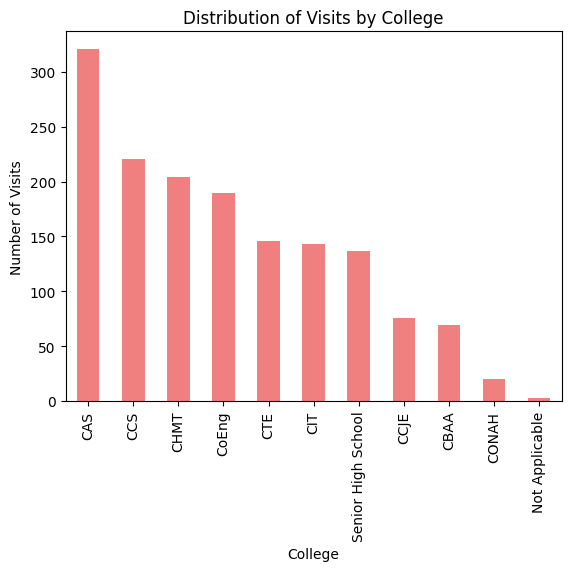


College: CAS
Number of Visits: 321

College: CBAA
Number of Visits: 69

College: CCJE
Number of Visits: 76

College: CCS
Number of Visits: 221

College: CHMT
Number of Visits: 204

College: CIT
Number of Visits: 143

College: CONAH
Number of Visits: 20

College: CTE
Number of Visits: 146

College: CoEng
Number of Visits: 190

College: Not Applicable
Number of Visits: 3

College: Senior High School
Number of Visits: 137


In [ ]:
# Group the data by 'College'
college_groups = df.groupby('College')

# Analyze the distribution of visits for each college
college_counts = college_groups.size().sort_values(ascending=False)

# Visualize the distribution of visits for each college
college_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Visits by College')
plt.xlabel('College')
plt.ylabel('Number of Visits')
plt.show()

# Identify trends or patterns specific to each college
for college, data in college_groups:
    print(f"\nCollege: {college}")
    print("Number of Visits:", len(data))
    # Add more analysis specific to each college as needed

**3. Distribution of visits by month for each college**

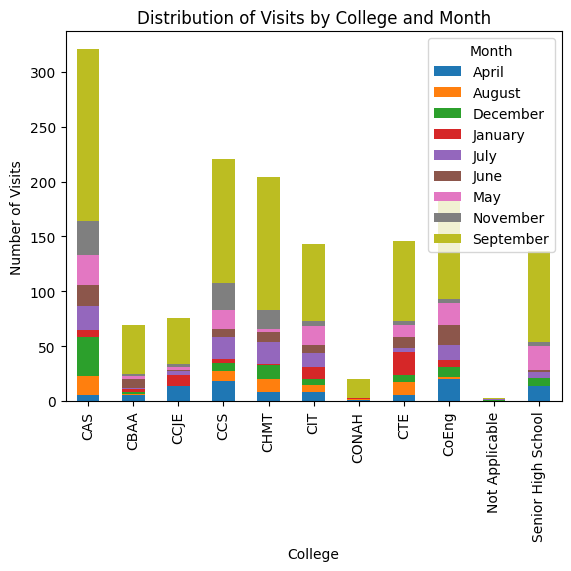

In [ ]:
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract month from 'Timestamp'
df['Month'] = df['Timestamp'].dt.month_name()

# Group the data by 'College' and 'Month'
college_month_groups = df.groupby(['College', 'Month'])

# Analyze the distribution of visits for each college and month
college_month_counts = college_month_groups.size().unstack().fillna(0)

# Visualize the distribution of visits for each college by month
college_month_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Visits by College and Month')
plt.xlabel('College')
plt.ylabel('Number of Visits')
plt.show()

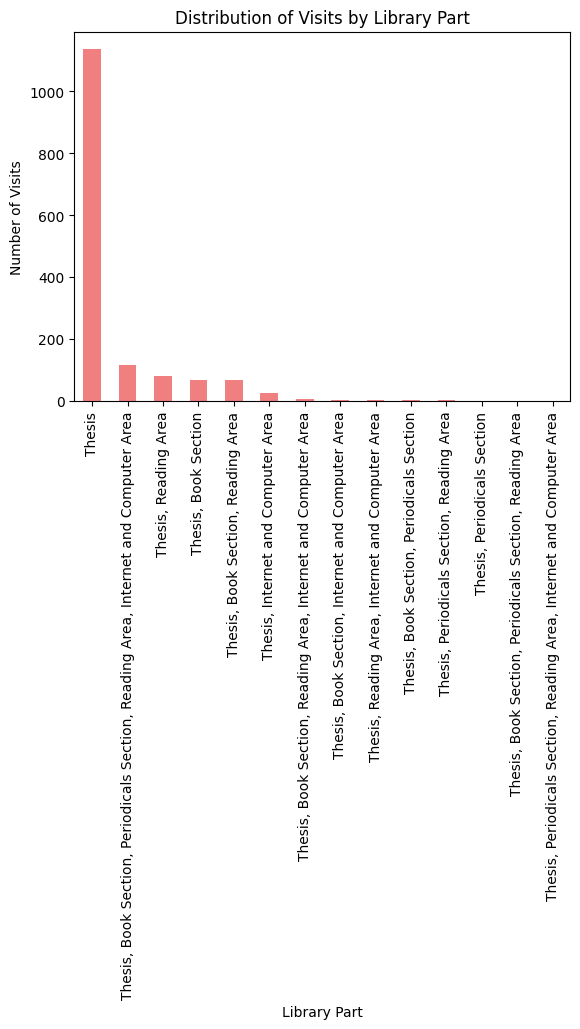

In [ ]:
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group the data by 'LibraryPart'
library_part_groups = df.groupby('What part/s of the library are you visiting? (you may check more than 1)')

# Analyze the distribution of visits for each library part
library_part_counts = library_part_groups.size().sort_values(ascending=False)

# Visualize the distribution of visits for each library part
library_part_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Visits by Library Part')
plt.xlabel('Library Part')
plt.ylabel('Number of Visits')
plt.show()

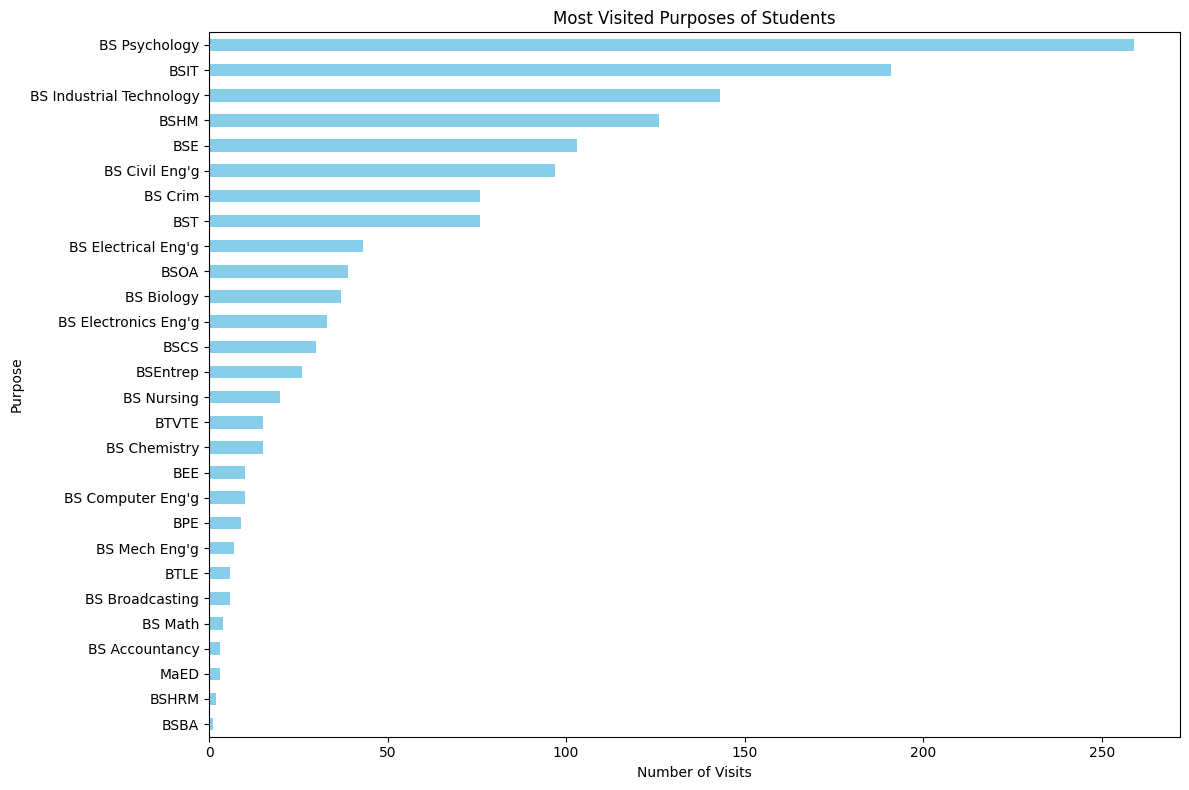

BS Psychology: 259
BSIT: 191
BS Industrial Technology: 143
BSHM: 126
BSE: 103
BS Civil Eng'g: 97
BS Crim: 76
BST: 76
BS Electrical Eng'g: 43
BSOA: 39
BS Biology: 37
BS Electronics Eng'g: 33
BSCS: 30
BSEntrep: 26
BS Nursing: 20
BTVTE: 15
BS Chemistry: 15
BEE: 10
BS Computer Eng'g: 10
BPE: 9
BS Mech Eng'g: 7
BTLE: 6
BS Broadcasting: 6
BS Math: 4
BS Accountancy: 3
MaED: 3
BSHRM: 2
BSBA: 1


In [ ]:

# Count the occurrences of each purpose
purpose_counts = df['What is your degree/course program?'].value_counts()

# Sort by value in descending order
purpose_counts_sorted = purpose_counts.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 8))
purpose_counts_sorted.plot(kind='barh', color='skyblue')  # horizontal bar plot
plt.title('Most Visited Purposes of Students')
plt.xlabel('Number of Visits')
plt.ylabel('Purpose')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent purpose at the top
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

for purpose, count in purpose_counts_sorted.items():
    print(f"{purpose}: {count}")